In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

#Viewing Summary()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [2]:
data = pd.read_csv('Data/Bank-data.csv')
data.head()

,w,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0,1,0,0,117,no
1,1,0.767,0,0,2,1,274,yes
2,2,4.858,0,1,0,0,167,no
3,3,4.120,0,0,0,0,686,yes
4,4,4.856,0,1,0,0,157,no


In [3]:
#Drop unwanted variable
data = data.drop(['w'], axis=1)

In [4]:
#Creating dummy variable
data['y'] = data['y'].map({'no':0,'yes':1})

In [5]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0,1,0,0,117,0
1,0.767,0,0,2,1,274,1
2,4.858,0,1,0,0,167,0
3,4.120,0,0,0,0,686,1
4,4.856,0,1,0,0,157,0


In [6]:
#Selecting dependent and independent variables
y = data['y']
x1 = data[['interest_rate','credit','march','may','previous','duration']]

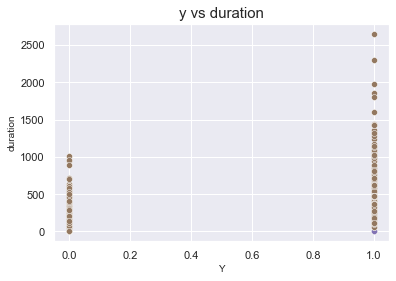

In [16]:
for feat in data.columns:
    if feat != 'y':
        sns.scatterplot(x = 'y', y = feat, data = data)
        plt.title(f"y vs {feat}", size = 15)
        plt.xlabel('Y', size = 10)
        plt.ylabel(feat, size = 10)

### Model Fitting

In [17]:
x = sm.add_constant(x1)

In [18]:
reg_lin = sm.Logit(y,x)
results_log = reg_lin.fit()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


In [19]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                  0.5153
Time:                        21:28:31   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.579e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1385      0.339     -0.408      0.683      -0.804       0.527
interest_rate    -0.7802      0.092     -8.471      0.000      -0.961      -0.600
credit            2.4028      1.090      2.205      0.027       0.267       4.538
march            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may               0.1946      0.229      0.849      0.396      -0.255       0.644
previous          1.2746      0.583      2.186      0.029       0.132       2.417
duration          0.0070      0.001      9.386      0.000       0.006       0.008
=================================================================================
"""

In [20]:
cm = pd.DataFrame(results_log.pred_table())

In [21]:
cm

,0,1
0,220.0,39.0
1,31.0,228.0


In [22]:
#Calculating accuracy
cm = np.array(cm)
accuracy_train = (cm[0,0] + cm[1,1])/cm.sum()
accuracy_train

0.8648648648648649

#### Testing

In [39]:
test = pd.read_csv('Data/Bank-data-testing.csv')
test.head()

,w,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0,1,0,0,487,no
1,1,4.961,0,0,0,0,132,no
2,2,4.856,0,1,0,0,92,no
3,3,4.120,0,0,0,0,1468,yes
4,4,4.963,0,0,0,0,36,no


In [40]:
test['y'] = test['y'].map({'no':0,'yes':1})

In [41]:
#Preparations
test = test.drop(['w'],axis=1)
test_actual = test['y']
test_data = test.drop(['y'], axis=1)
test_data.head()

,interest_rate,credit,march,may,previous,duration
0,1.313,0,1,0,0,487
1,4.961,0,0,0,0,132
2,4.856,0,1,0,0,92
3,4.120,0,0,0,0,1468
4,4.963,0,0,0,0,36


In [42]:
#Adding constant for better predictions
test_data = sm.add_constant(test_data)
pred_test = results_log.predict(test_data)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [44]:
pred_test = [1 if i > 0.5 else 0 
             for i in pred_test.values]

In [46]:
cm = confusion_matrix(test_actual, pred_test)
cm

array([[94, 17],
       [12, 99]], dtype=int64)

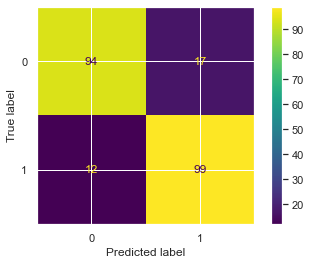

In [49]:
#Confusion matrix plots
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [50]:
print(classification_report(test_actual, pred_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       111
           1       0.85      0.89      0.87       111

    accuracy                           0.87       222
   macro avg       0.87      0.87      0.87       222
weighted avg       0.87      0.87      0.87       222

